In [1]:
! pip install transformers

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

Load dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
fake_data=pd.read_csv("/content/drive/MyDrive/FakeNewsEnglish-Dataset/Fake.csv/Fake.csv")
real_data=pd.read_csv("/content/drive/MyDrive/FakeNewsEnglish-Dataset/True.csv/True.csv")

Data Analysis

In [6]:
fake_data.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [7]:
real_data.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


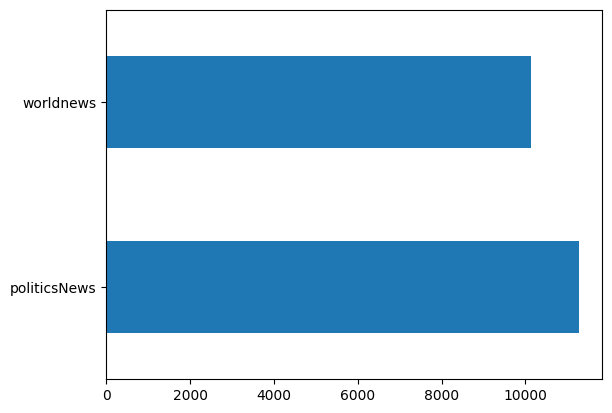

In [8]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5


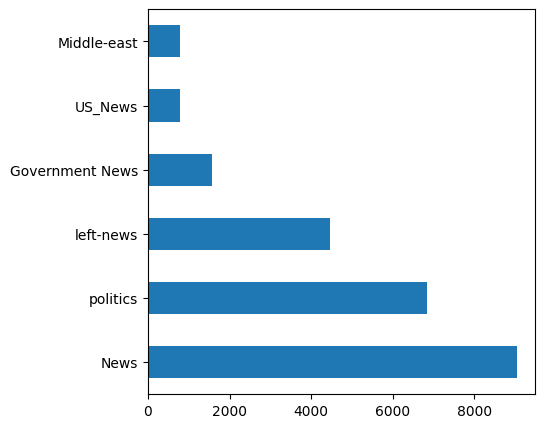

In [9]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

In [10]:
fake_data["label"]="fake"
real_data["label"]="real"

In [11]:
final_data= pd.concat([fake_data,real_data])

In [12]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [13]:
final_data.head(10)

,title,text,subject,date,label
0,PELOSI CHUCKLES AND MOCKS President Trump when...,What a bizarre exchange between a reporter and...,politics,"Dec 21, 2017",fake
1,Trump Has Brain Fart In Middle Of Executive O...,Donald Trump is unwell.The beleaguered preside...,News,"March 31, 2017",fake
2,China says part of Hong Kong rail station to b...,BEIJING/HONG KONG (Reuters) - China s parliame...,worldnews,"December 27, 2017",real
3,Worries about Malaysia's 'Arabisation' grow as...,Kuala Lumpur (Reuters) - Malaysia s growing ti...,worldnews,"December 21, 2017",real
4,Ivanka Trump Legally BARRED From Participatin...,The Office of Government Ethics has said that ...,News,"May 1, 2017",fake
5,HOMELAND SECURITY Catering to Illegals? Three ...,Read more: TMZ,politics,"Mar 10, 2017",fake
6,"HILLARY COUGHING AGAIN, NEEDS ASSISTANCE WALKI...",Hillary fights back a cough at a tiny rally in...,politics,"Sep 30, 2016",fake
7,NEVER FORGET? College Students Give DISTURBING...,Baffling the worst terrorist attack in history...,politics,"Sep 12, 2015",fake
8,"Even After Charlottesville, If You Hit Protes...",This year America has seen an interesting and ...,News,"August 18, 2017",fake
9,Boeing Cuts 10% Of Jobs After Receiving $8.7 ...,"The Commercial Airplane Corporation, Boeing, a...",News,"April 12, 2016",fake


In [14]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [15]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,PELOSI CHUCKLES AND MOCKS President Trump when...,What a bizarre exchange between a reporter and...,fake
1,Trump Has Brain Fart In Middle Of Executive O...,Donald Trump is unwell.The beleaguered preside...,fake
2,China says part of Hong Kong rail station to b...,BEIJING/HONG KONG (Reuters) - China s parliame...,real
3,Worries about Malaysia's 'Arabisation' grow as...,Kuala Lumpur (Reuters) - Malaysia s growing ti...,real
4,Ivanka Trump Legally BARRED From Participatin...,The Office of Government Ethics has said that ...,fake
...,...,...,...
44893,END OF THE ROAD FOR AMERICA’S CORPORATE DARLIN...,Thank goodness for mandatory financial disclo...,fake
44894,Clinton warns of possible Trump Supreme Court ...,WASHINGTON - Democratic presidential front-run...,real
44895,This State Is Honoring Obama And Sending A Mi...,President Obama s home state of Illinois has p...,fake
44896,Trump BUSTED Giving The Middle Finger To Ital...,If you didn t already think Donald Trump embar...,fake


In [16]:
final_data.head()

,title,text,subject,date,label
0,PELOSI CHUCKLES AND MOCKS President Trump when...,What a bizarre exchange between a reporter and...,politics,"Dec 21, 2017",fake
1,Trump Has Brain Fart In Middle Of Executive O...,Donald Trump is unwell.The beleaguered preside...,News,"March 31, 2017",fake
2,China says part of Hong Kong rail station to b...,BEIJING/HONG KONG (Reuters) - China s parliame...,worldnews,"December 27, 2017",real
3,Worries about Malaysia's 'Arabisation' grow as...,Kuala Lumpur (Reuters) - Malaysia s growing ti...,worldnews,"December 21, 2017",real
4,Ivanka Trump Legally BARRED From Participatin...,The Office of Government Ethics has said that ...,News,"May 1, 2017",fake


In [17]:
final_data.label.value_counts()

fake    23481
real    21417
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

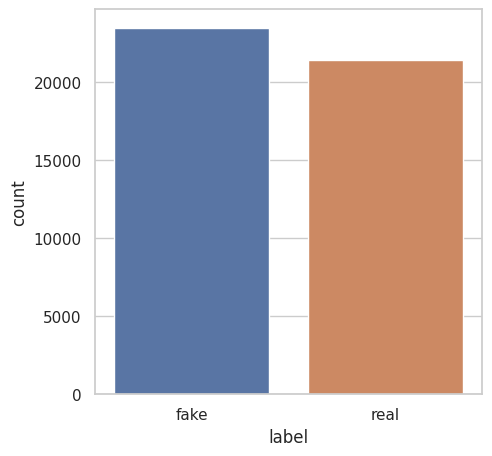

In [18]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [19]:
final_data.head(5)

,title,text,subject,date,label
0,PELOSI CHUCKLES AND MOCKS President Trump when...,What a bizarre exchange between a reporter and...,politics,"Dec 21, 2017",fake
1,Trump Has Brain Fart In Middle Of Executive O...,Donald Trump is unwell.The beleaguered preside...,News,"March 31, 2017",fake
2,China says part of Hong Kong rail station to b...,BEIJING/HONG KONG (Reuters) - China s parliame...,worldnews,"December 27, 2017",real
3,Worries about Malaysia's 'Arabisation' grow as...,Kuala Lumpur (Reuters) - Malaysia s growing ti...,worldnews,"December 21, 2017",real
4,Ivanka Trump Legally BARRED From Participatin...,The Office of Government Ethics has said that ...,News,"May 1, 2017",fake


In [20]:
final_data["text"]=final_data["title"]+final_data["text"]

In [21]:
final_data=final_data[["text","label"]]

In [22]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

<ipython-input-22-8070d13510ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['label'] = final_data['label'].map({'real':1, 'fake':0})


In [23]:

final_data.sample(5)

,text,label
11468,Acting SEC chair signals support for penalties...,1
24192,LIVE FEED: PRESIDENT TRUMP IN TENNESSEE: Nashv...,0
25682,Somalia releases jailed ex-minister and govern...,1
27101,McConnell Says He’ll Obstruct ANY Effort To H...,0
15358,"China will not deviate from path of reform, sa...",1


In [24]:
final_data.label[9943]

0

In [25]:
final_data.text[36709]

'The Angry Left Attacks Trump for Letting 11-Year Old Mow White House Lawn [Video]President Trump just made an 11-year old boy s wish come true but the left is in a tizzy over it. Frank Giaccio wrote to the president offering to cut the White House lawn. He usually charges $8 dollars but offered to cut the grass at no charge LOL! The president took him up on the offer! Frank was seen mowing the lawn yesterday:A great moment but the left didn t think so. President Trump was hammered on twitter for supposed child labor violations Can you believe it? Trump is bashed for this awesome moment of fun with a young American who is working hard to make money?HERE S MORE ON WHAT HAPPENED YESTERDAY AND JUST HOW GREAT THIS WAS   NO MATTER WHAT THE LEFT SAYS!The National Park Service might be out of a job keeping the White House grounds maintained. A 10-year-old boy named Frank wrote President Donald Trump to offer his lawn mowing services  at no charge    and we all know the President loves a good 

In [26]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [27]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [28]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [29]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [31]:
def tokenize(X):

    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [32]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [33]:
maxlen=100

create bert model

In [47]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(128,activation="relu")(x)
    x=Dropout(0.3)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model



In [48]:
model=create_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_5[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_6[0][0]']             
                             hidden_state=(None, 100, 7                                           
                             68),                                                           

# New Section

In [50]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-05,
    decay_steps=10000,
    decay_rate=0.9)

In [51]:
optimizer = Adam(learning_rate=lr_schedule, epsilon=1e-08,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [52]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=50,baseline=0.4,min_delta=0.0001,restore_best_weights=False)

In [53]:
history = model.fit(x = {'input_5':X_train_token['input_ids'],'input_6':X_train_token['attention_mask']}, y = Y_train, epochs=3, validation_split = 0.2, batch_size = 100, callbacks=[callback])

Epoch 1/3
288/288 [==============================] - 760s 2s/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0068 - val_accuracy: 0.9979
Epoch 2/3
288/288 [==============================] - 658s 2s/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.0022 - val_accuracy: 0.9997
Epoch 3/3
288/288 [==============================] - 624s 2s/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 0.9997


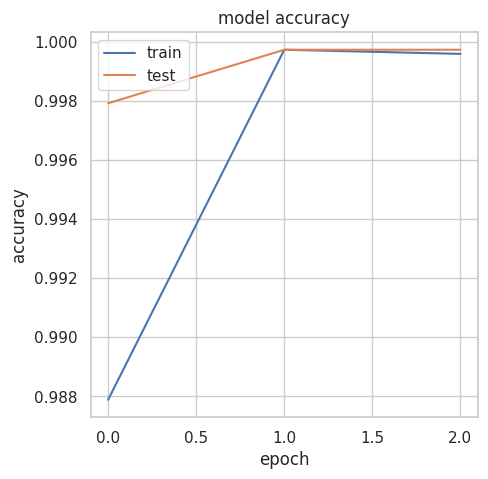

In [54]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

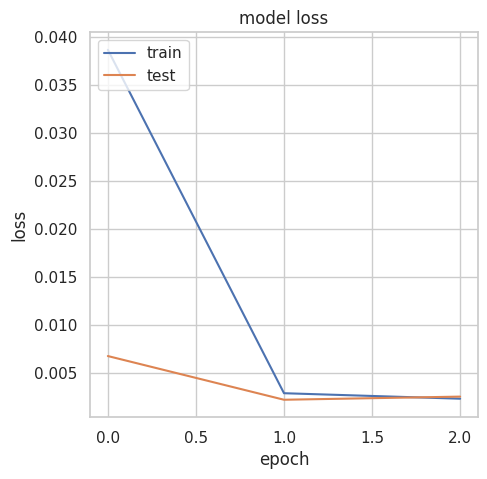

In [55]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [57]:
y_pred = np.where(model.predict({ 'input_5' : X_test_token['input_ids'] , 'input_6' : X_test_token['attention_mask']}) >=0.5,1,0)

281/281 [==============================] - 69s 223ms/step


Confusion matrix

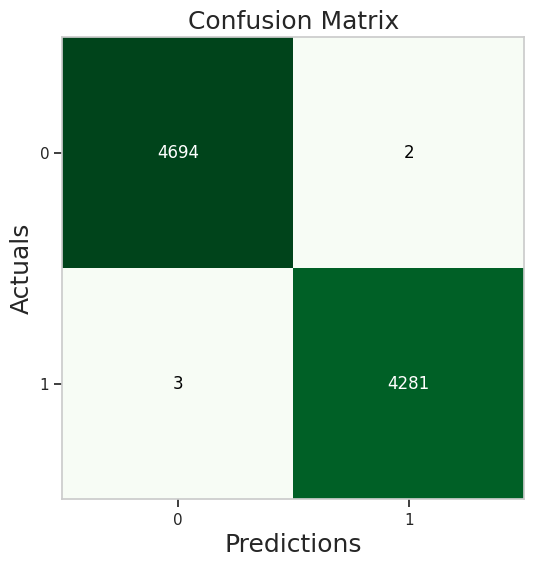

In [58]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [59]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Custom data prediction

In [74]:
test_text="The police shooting of black teen Michael Brown at the hands of then Ferguson, Missouri white cop Darren Wilson ignited a national firestorm regarding the fact that cops often shoot and kill unarmed black people for little more than existing. That birthed the #BlackLivesMatter movement. Then, there were the protests, unrest, and violence in Baltimo"

In [75]:
test_token = tokenize(test_text)
test_text_pred = np.where(model.predict({ 'input_5' : test_token['input_ids'] , 'input_6' : test_token['attention_mask']}) >=0.5,1,0)
if(test_text_pred[0]==0):
    print("Fake news")
else:
    print("Real news")

11/11 [==============================] - 3s 232ms/step
Real news
